# Ranking Neighborhoods By Pools And Spray Parks 
As a part of our metric we belive that a great neighbor hood should have access to many pools as pools have always been known to correspond to happiness.

In [50]:
import sys
import pandas as pd
!{sys.executable} -m pip install geopandas --user
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
!{sys.executable} -m pip install folium --user
from folium.plugins import HeatMap

import folium


In [7]:
pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
pools.head(3)

,_id,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,2,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,3,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173


lets clean up the data a bit so only what is important appears.

In [57]:
total = pools.groupby(["neighborhood","type"]).size().reset_index(name="Count").sort_values(by="Count", ascending=True)
total.head(5)

,neighborhood,type,Count
0,Allegheny Center,Pool,1
23,Squirrel Hill South,Pool,1
22,South Side Slopes,Spray Park,1
20,Sheraden,Pool,1
19,Shadyside,Spray Park,1


lets pivot the values so it's clear what types of water actvities each neighborhood offers

In [100]:
pivot = total.pivot(index="neighborhood", columns="type", values="Count").fillna(0).astype(int).sort_values(by="Pool", ascending=False)
pivot

type,Pool,Spray Park
neighborhood,,
Highland Park,2,0
South Side Flats,2,0
Allegheny Center,1,0
Squirrel Hill South,1,0
Sheraden,1,0
Polish Hill,1,0
Perry North,1,0
Mount Washington,1,0
Lincoln Place,1,0


next let's make a bar graph to help visualize the result.

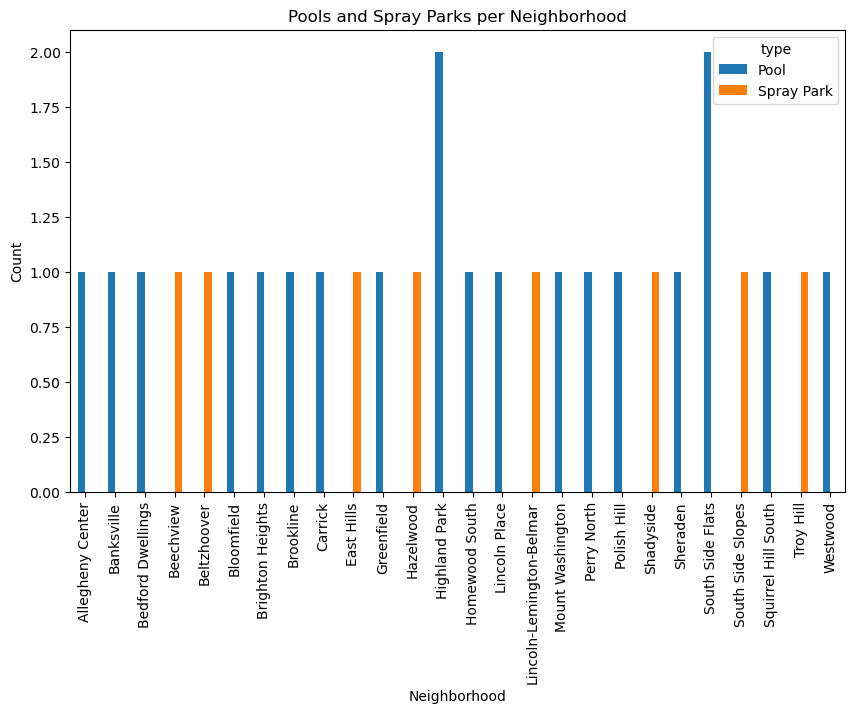

In [92]:
pivot.plot(kind='bar', stacked=False, figsize=(10, 6)) #converting data from last cell to plot

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.
plt.title('Pools and Spray Parks per Neighborhood')

# Show graph
plt.show()


Using Geo pandas to create a map of the density of pools in the area

In [52]:
latitude = pools['latitude'].mean()#setting base location for the map
longitude = pools['longitude'].mean()
m = folium.Map(location=[latitude, longitude], zoom_start=12)
heat_data = [[row['latitude'], row['longitude']] for index, row in pools.iterrows()]# Adding points to the map

HeatMap(heat_data).add_to(m)
m # displays map



## Conclusion based of pool data
After interpeting the data I found that Highland Park and South Flats had the greatest number of Pools in their neighborhood. With Squirrel Hill South, Allegheny Center, and Sheraden not far behind. Overall many of the neighborhoods in Pittsburgh have atleast 1 pool or spray park so I don't think the number of pools needs to be weighed very high in the metric as long as atleast one pool is present. Still there are signifcant advantages to having two Pools.
